IMPORT USEFUL LIBRARIES

In [790]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
from chart_studio import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
init_notebook_mode(connected=True)
import mplfinance as mpf
# from mpl_finance import candlestick2_ochl, candlestick_ohlc
plt.style.use('ggplot')

IMPORT THE DATA

In [791]:
df = pd.read_csv('C:/Users/Ayo Agbaje/Downloads/Microsoft_Stock.csv')

EXPLORATORY DATA ANALYSIS

In [792]:
df

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012


In [793]:
print (df.isnull().sum())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [794]:
df

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012


In [795]:
df['Date'] = pd.to_datetime(df['Date'])

In [796]:
# def date(ret):
#     return ret.date()


# df['Date'] = df['Date'].apply(date)

In [797]:
df  = df.set_index('Date')

THE DAY THAT RECORDED THE HIGHEST CLOSING PRICE BETWEEN THE PERIOD

In [798]:
b = df['Close'].idxmax()
print (b)

2021-02-12 16:00:00


GRAPHS SHOWING BEHAVIORAL PATTERNS OF STOCK PRICES DURING DURING THE PERIOD

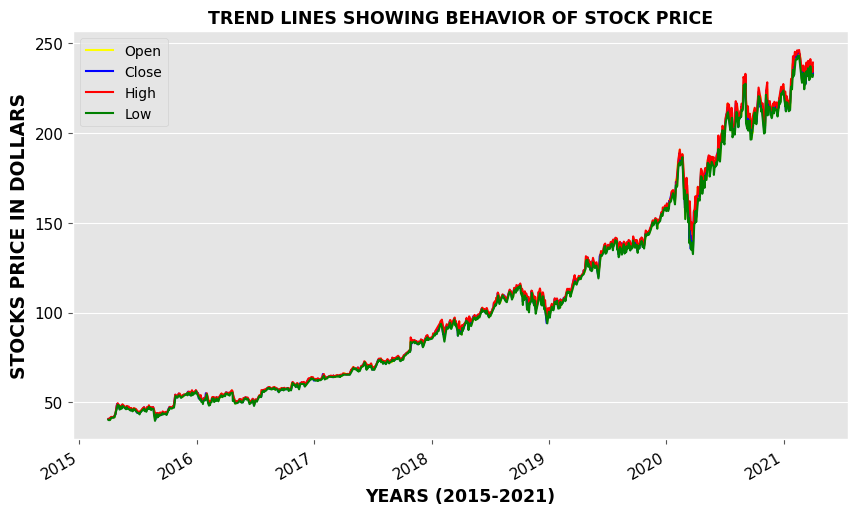

In [799]:
plt.style.use('ggplot')
df.plot(y = ['Open', 'Close', 'High', 'Low'], color = ['yellow', 'blue', 'red', 'green'], figsize = (10,6))
plt.tick_params(labelsize = 11, labelcolor = 'black', axis='both')
plt.ylabel('STOCKS PRICE IN DOLLARS', fontsize = 13.5, color = 'black', fontweight = 'bold')
plt.xlabel('YEARS (2015-2021)', fontsize = 12.5, color = 'black', fontweight = 'bold')
plt.title('TREND LINES SHOWING BEHAVIOR OF STOCK PRICE', fontsize = 12.5, color = 'black', fontweight = 'bold')
plt.grid(axis = 'x')
plt.savefig('C:/Users/Ayo Agbaje/Documents/Code/Python/GIGS/IMAGES/ML_gig/stock1.jpg')

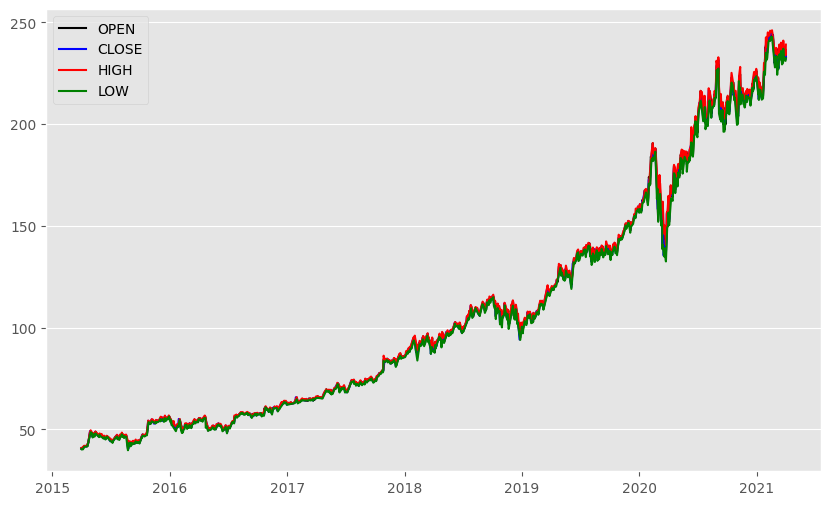

In [800]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,6))
ax.plot(df.index, df['Open'], color = 'black', label = 'OPEN')
ax.plot(df.index, df['Close'], color = 'blue', label = 'CLOSE')
ax.plot(df.index, df['High'], color = 'red', label = 'HIGH')
ax.plot(df.index, df['Low'], color = 'green', label = 'LOW')
plt.legend(loc = (0))
plt.grid(axis = 'x')

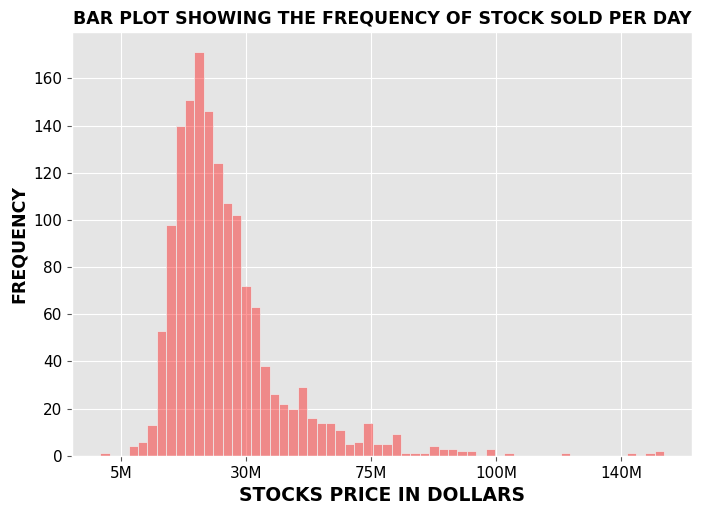

In [801]:
plt.figure(figsize = (8, 5.5))
# plt.hist(df['Open'], bins = 30)
sns.histplot(df['Volume'], color = 'red', alpha = 0.4)
plt.tick_params(labelsize = 11, labelcolor = 'black', axis='both')
plt.xlabel('STOCKS PRICE IN DOLLARS', fontsize = 13.5, color = 'black', fontweight = 'bold')
plt.ylabel('FREQUENCY', fontsize = 12.5, color = 'black', fontweight = 'bold')
plt.title('BAR PLOT SHOWING THE FREQUENCY OF STOCK SOLD PER DAY', fontsize = 12.5, color = 'black', fontweight = 'bold')
plt.xticks(np.arange(5000000, 150000001, 30000000),
            ['5M', '30M', '75M', '100M', '140M'])
plt.savefig('C:/Users/Ayo Agbaje/Documents/Code/Python/GIGS/IMAGES/ML_gig/stock2.jpg')

In [802]:
figure = go.Figure(
    data = [
        go.Candlestick(
            x = df.index,
            low = df['Low'],
            high = df['High'],
            close = df['Close'],
            open = df['Open'],
            increasing_line_color = 'green',
            decreasing_line_color = 'red'
        )
    ]
)
figure.update_layout(xaxis_rangeslider_visible = False)
figure.update_layout(title = 'MICROSOFT STOCK PRICE (USD $)', yaxis_title = 'STOCK PRICE IN DOLLARS', xaxis_title = 'DATE')
figure.show()


c:\Users\Ayo Agbaje\my_venv\lib\site-packages\mplfinance\_arg_validators.py:36: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




<Figure size 1500x850 with 0 Axes>

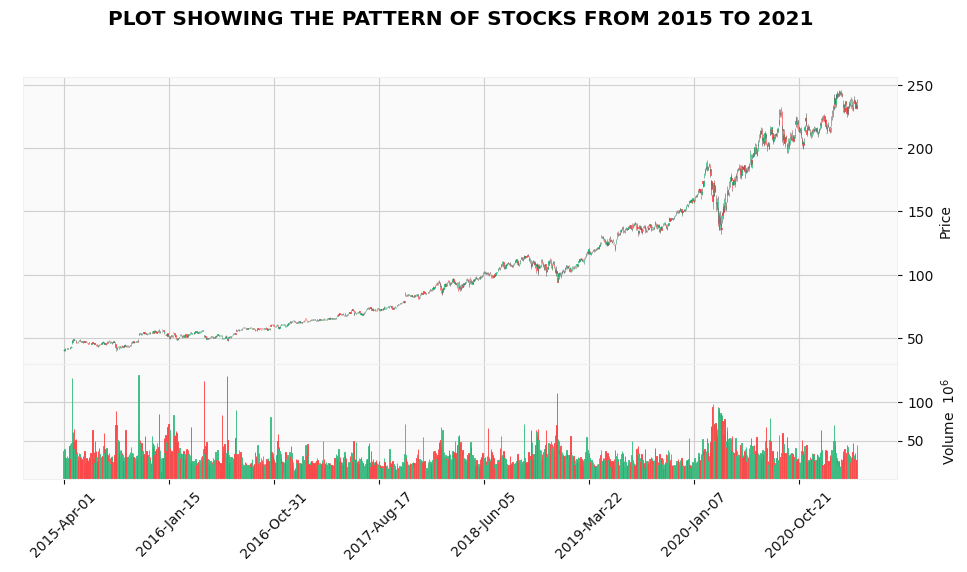

In [837]:
plt.figure(figsize = (15,8.5))
mpf.plot(df, type = 'candle', volume = True, figratio = (19,9), 
         title = '              PLOT SHOWING THE PATTERN OF STOCKS FROM 2015 TO 2021', \
         style = 'yahoo')

<Figure size 1500x850 with 0 Axes>

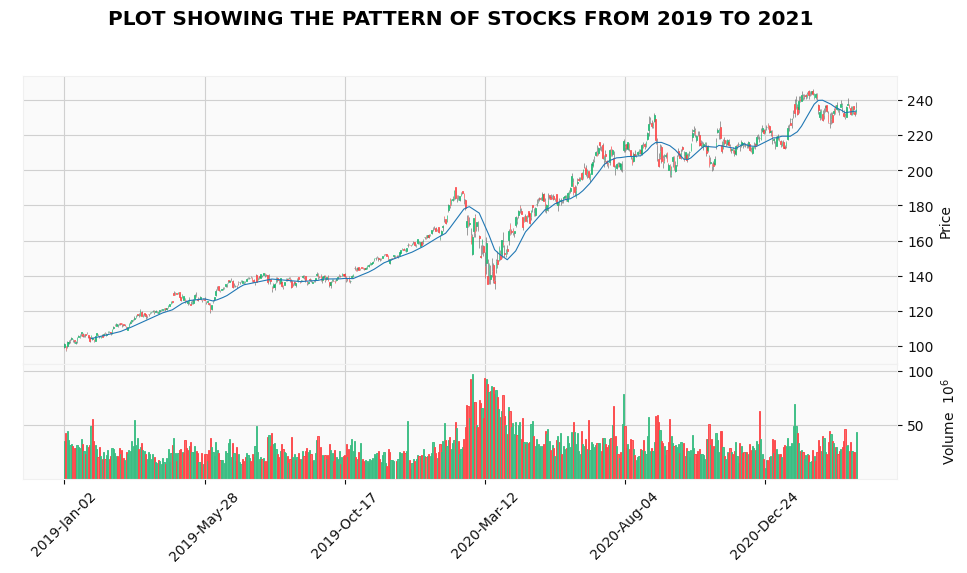

In [835]:
plt.figure(figsize = (15,8.5))
mpf.plot(df['2019' : '2021'], type = 'candle', volume = True, figratio = (19,9), \
            mav = 20, title = '              PLOT SHOWING THE PATTERN OF STOCKS FROM 2019 TO 2021', \
            style = 'yahoo')

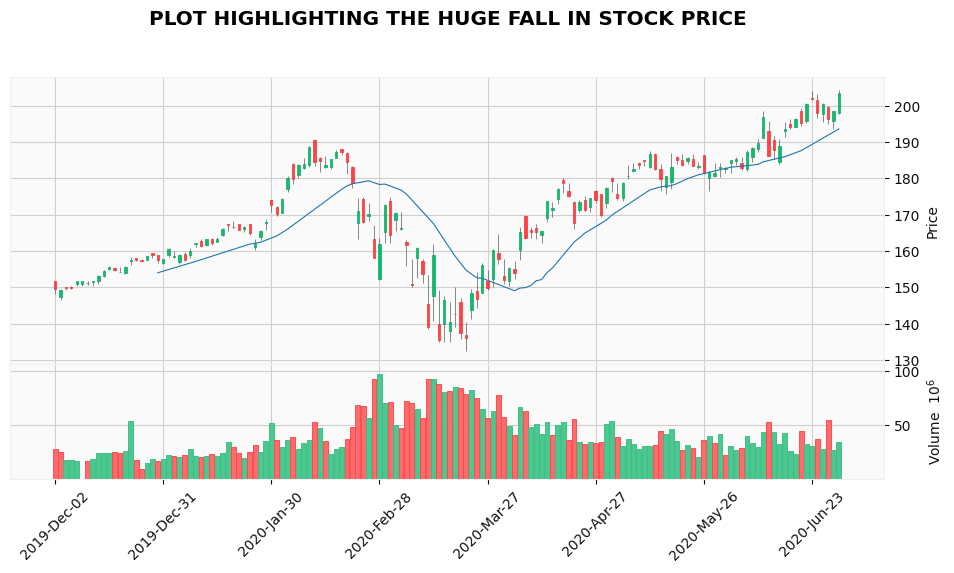

In [838]:
# plt.figure(figsize = (15,8.5))
mpf.plot(df['2019-12' : '2020-06'], type = 'candle', volume = True, figratio = (19,9), \
            mav = 20, title = '              PLOT HIGHLIGHTING THE HUGE FALL IN STOCK PRICE', \
            style = 'yahoo')

In [806]:
df.iloc[[df['Volume'].argmax()]]


,Open,High,Low,Close,Volume
Date,,,,,
2015-10-23 16:00:00,52.3,54.07,52.25,52.87,135227059


In [807]:
# df.loc['Average'] = df[df.columns].mean()
# print (df.loc[['Average']])

In [808]:
def roundd(rind):
    return np.round(rind, 2)


df[df.columns[0:]] = df[df.columns[0:]].apply(roundd)

In [809]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2015-04-01 16:00:00 to 2021-03-31 16:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1511 non-null   float64
 1   High    1511 non-null   float64
 2   Low     1511 non-null   float64
 3   Close   1511 non-null   float64
 4   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 103.1 KB
None


In [810]:
# print (type(a.corrwith(a['Volume'])))

In [811]:
c = pd.DataFrame(data=df.corrwith(df['Volume']), columns = ['Correlation with Volume']).drop('Volume', axis = 0)
print (c)

       Correlation with Volume
Open                  0.054072
High                  0.062573
Low                   0.044514
Close                 0.052153


<AxesSubplot:xlabel='Open', ylabel='Volume'>

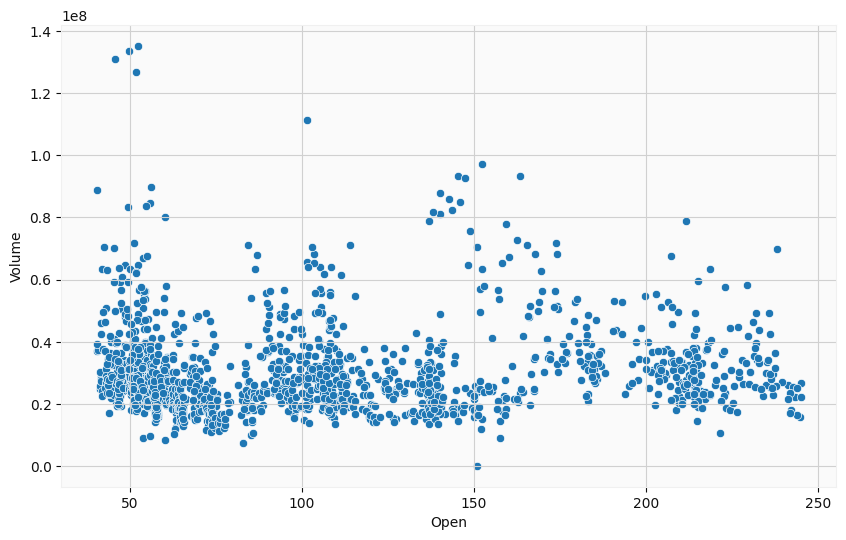

In [812]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'Open', y = 'Volume', data = df)

In [813]:
deef = pd.DataFrame(data = [df[df.columns].min(), df[df.columns].median(), df[df.columns].max()], 
                    index = ['MIN VALUES', 'MEDIAN OF VALUES', 'MAXIMUM VALUES'])
# deef

In [814]:
def roundd(rind):
    return np.round(rind, 2)


deef[deef.columns[0:]] = deef[deef.columns[0:]].apply(roundd)

In [815]:
deef

,Open,High,Low,Close,Volume
MIN VALUES,40.34,40.74,39.72,40.29,101612.0
MEDIAN OF VALUES,93.99,95.10,92.92,93.86,26629615.0
MAXIMUM VALUES,245.03,246.13,242.92,244.99,135227059.0


In [816]:
df['Max Increase From Open Price'] = df['High'] - df['Open']
df['Net Change'] = df['Close'] - df['Open']

THE DAY THAT RECORDED THE MAXIMUM INCREASE FROM THE OPEN PRICE

In [817]:
print(df['Max Increase From Open Price'].idxmax())
# print(df['Max Increase From Open Price'].argmax())
# print (df['Max Increase From Open Price'].max())
# print (df.iloc[[1246]])

2020-03-13 16:00:00


In [818]:
df

,Open,High,Low,Close,Volume,Max Increase From Open Price,Net Change
Date,,,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,0.16,0.12
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,0.08,-0.37
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,1.44,1.21
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,0.30,-0.08
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,0.21,-0.06
...,...,...,...,...,...,...,...
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853,1.64,-2.96
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853,5.16,4.93
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455,0.21,-1.35


NO OF INSTANCES WHERE THE STOCK PRICE CLOSED AT A HIGHER PRICE THAN THE OPEN PRICE 

In [819]:
close_more_than_open = df[df['Net Change'] > 0]
print (len(close_more_than_open))

802


In [820]:
# a = [1, 2, 4, 2]
# b = [2, 3, 4, 9]
# a = np.array(a)
# b = np.array(b)

# c = pd.DataFrame(data = [a, b])
# c

MACHINE LEARNING (PREDICTING THE CLOSING PRICE FOR EACH DAY)

In [821]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [822]:
X = df.drop(['Close', 'Max Increase From Open Price', 'Net Change'], axis = 1).values
y = df['Close'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 101)

In [823]:
scale = MinMaxScaler(feature_range=(0,1))
scale.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

In [824]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [825]:
preds = lr.predict(X_test)

In [826]:
print (explained_variance_score(y_test, preds))
print (mean_absolute_error(y_test,preds))

0.99982985459908
0.44666146232181636


In [827]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [828]:
model = Sequential()
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=1, activation='linear'))

call = EarlyStopping(monitor='val_loss', patience=25, verbose=1, mode='auto')
model.compile(optimizer='adam', metrics=['accuracy'], loss = 'mse')
model.fit(x = X_train,
          y = y_train,
          epochs = 100,
          validation_data=(X_test, y_test),
          batch_size=2,
          callbacks=[call])


Epoch 1/100
642/642 [==============================] - 2s 2ms/step - loss: 10417.0977 - accuracy: 0.0000e+00 - val_loss: 337.1088 - val_accuracy: 0.0000e+00
Epoch 2/100
642/642 [==============================] - 2s 3ms/step - loss: 198.0923 - accuracy: 0.0000e+00 - val_loss: 85.4797 - val_accuracy: 0.0000e+00
Epoch 3/100
642/642 [==============================] - 2s 3ms/step - loss: 36.2138 - accuracy: 0.0000e+00 - val_loss: 9.2373 - val_accuracy: 0.0000e+00
Epoch 4/100
642/642 [==============================] - 1s 2ms/step - loss: 3.6375 - accuracy: 0.0000e+00 - val_loss: 1.6531 - val_accuracy: 0.0000e+00
Epoch 5/100
642/642 [==============================] - 1s 2ms/step - loss: 1.7085 - accuracy: 0.0000e+00 - val_loss: 1.5949 - val_accuracy: 0.0000e+00
Epoch 6/100
642/642 [==============================] - 1s 2ms/step - loss: 1.6835 - accuracy: 0.0000e+00 - val_loss: 1.5560 - val_accuracy: 0.0000e+00
Epoch 7/100
642/642 [==============================] - 1s 2ms/step - loss: 1.7265 - 

            loss  accuracy  validation_loss  validation_accuracy
0   10417.097656       0.0       337.108795                  0.0
1     198.092255       0.0        85.479706                  0.0
2      36.213802       0.0         9.237329                  0.0
3       3.637468       0.0         1.653122                  0.0
4       1.708504       0.0         1.594898                  0.0
..           ...       ...              ...                  ...
95      1.875519       0.0         1.312689                  0.0
96      1.851151       0.0         2.079169                  0.0
97      1.719447       0.0         1.294269                  0.0
98      1.863616       0.0         1.305030                  0.0
99      1.722889       0.0         1.627924                  0.0

[100 rows x 4 columns]


<AxesSubplot:>

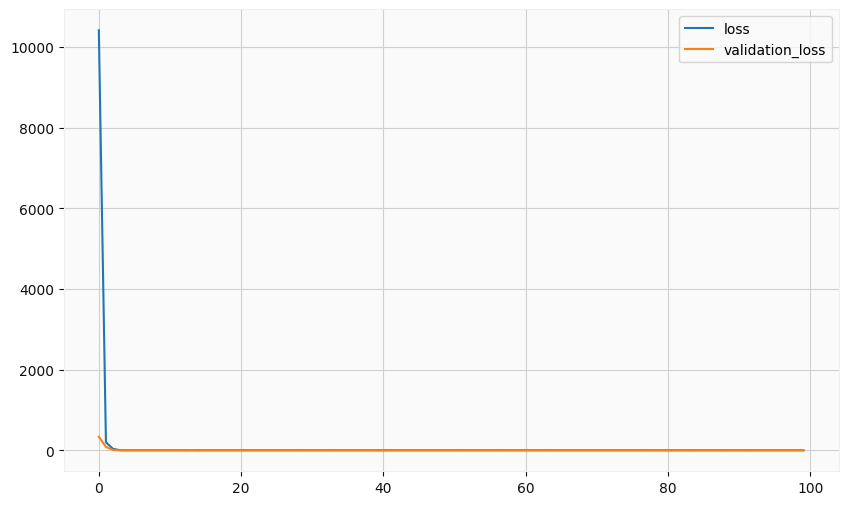

In [829]:
loss_data = pd.DataFrame(data = model.history.history)
loss_data.columns = ['loss', 'accuracy', 'validation_loss', 'validation_accuracy']
print (loss_data)
# df[['loss', 'validation_loss']].plot()
loss_data.plot(y = ['loss', 'validation_loss'], figsize = (10,6))

In [830]:
k_preds = model.predict(X_test)

In [831]:
print (explained_variance_score(y_test, k_preds))
print (mean_absolute_error(y_test,k_preds))

0.9995434073426861
0.8438495545240222


In [832]:
df.to_excel('C:/Users/Ayo Agbaje/Documents/Code/Python/GIGS/SAVED DATA/edited.xlsx')

<AxesSubplot:>

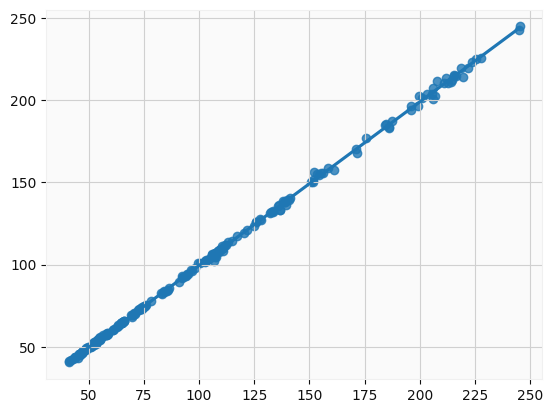

In [841]:
sns.regplot(x = k_preds.reshape(-1,), y = y_test.reshape(-1,))

In [846]:
g = df.iloc[[12]]['Close']
print (g)
tbp = df.iloc[[12]].drop(['Close', 'Max Increase From Open Price', 'Net Change'], axis = 1).values
scale.fit(tbp)
tbp = scale.transform(tbp)

predded = model.predict(tbp)
print (predded)


Date
2015-04-20 16:00:00    42.91
Name: Close, dtype: float64
[[40.572342]]
